In [1]:
import pandas as pd
import yfinance as yf

In [2]:
start = '2021-01-01'

In [3]:
data = yf.download('OR.BK PTTGC.BK PTT.BK PTTEP.BK',start=start)

[*********************100%***********************]  4 of 4 completed


In [4]:
df = data.Close

In [5]:
df = df.pct_change().dropna()

In [6]:
df

,OR.BK,PTT.BK,PTTEP.BK,PTTGC.BK
Date,,,,
2021-02-15,0.162393,0.024845,0.031390,0.011858
2021-02-16,-0.036765,0.000000,-0.008696,0.035156
2021-02-17,-0.099237,-0.012121,-0.008772,-0.011321
2021-02-18,0.025424,-0.006135,0.008850,0.000000
2021-02-19,0.041322,-0.012346,-0.021930,-0.030534
...,...,...,...,...
2023-02-22,0.000000,-0.015038,-0.021944,0.000000
2023-02-23,-0.008696,-0.015267,-0.012821,-0.020513
2023-02-24,-0.013158,0.007752,-0.009740,-0.005236


In [7]:
df = df[['OR.BK','PTTEP.BK','PTTGC.BK','PTT.BK']]


In [8]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [9]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

2023-03-01 01:32:48.832880: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [11]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(3,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

2023-03-01 01:32:55.737500: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None


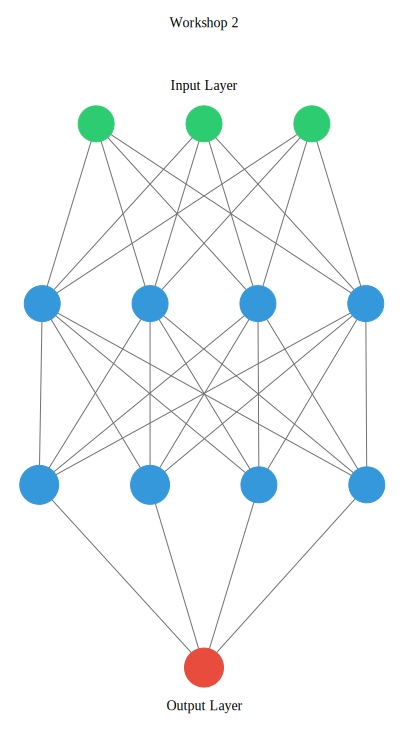

In [13]:
from ann_visualizer.visualize import ann_viz
import graphviz

ann_viz(model, view=True, title='Workshop 2')
with open('network.gv') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

In [15]:
import tensorflow as tf

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='MeanSquaredError', metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
24/24 [==============================] - 0s 749us/step - loss: 2.0996e-04 - accuracy: 0.2378
Epoch 2/100
24/24 [==============================] - 0s 683us/step - loss: 1.7326e-04 - accuracy: 0.2378
Epoch 3/100
24/24 [==============================] - 0s 791us/step - loss: 1.9208e-04 - accuracy: 0.2378
Epoch 4/100
24/24 [==============================] - 0s 861us/step - loss: 1.6565e-04 - accuracy: 0.2378
Epoch 5/100
24/24 [==============================] - 0s 838us/step - loss: 1.7825e-04 - accuracy: 0.2378
Epoch 6/100
24/24 [==============================] - 0s 829us/step - loss: 1.6250e-04 - accuracy: 0.2378
Epoch 7/100
24/24 [==============================] - 0s 765us/step - loss: 1.7514e-04 - accuracy: 0.2378
Epoch 8/100
24/24 [==============================] - 0s 922us/step - loss: 1.6143e-04 - accuracy: 0.2378
Epoch 9/100
24/24 [==============================] - 0s 873us/step - loss: 1.6487e-04 - accuracy: 0.2378
Epoch 10/100
24/24 [==============================] - 0

24/24 [==============================] - 0s 706us/step - loss: 1.6922e-04 - accuracy: 0.2378
Epoch 79/100
24/24 [==============================] - 0s 673us/step - loss: 1.7475e-04 - accuracy: 0.2378
Epoch 80/100
24/24 [==============================] - 0s 679us/step - loss: 1.6231e-04 - accuracy: 0.2378
Epoch 81/100
24/24 [==============================] - 0s 709us/step - loss: 1.9725e-04 - accuracy: 0.2378
Epoch 82/100
24/24 [==============================] - 0s 692us/step - loss: 1.6629e-04 - accuracy: 0.2378
Epoch 83/100
24/24 [==============================] - 0s 749us/step - loss: 1.7064e-04 - accuracy: 0.2378
Epoch 84/100
24/24 [==============================] - 0s 757us/step - loss: 1.6505e-04 - accuracy: 0.2378
Epoch 85/100
24/24 [==============================] - 0s 821us/step - loss: 1.6783e-04 - accuracy: 0.2378
Epoch 86/100
24/24 [==============================] - 0s 751us/step - loss: 1.8512e-04 - accuracy: 0.2378
Epoch 87/100
24/24 [==============================] - 0s 77

In [18]:
import matplotlib.pyplot as plt

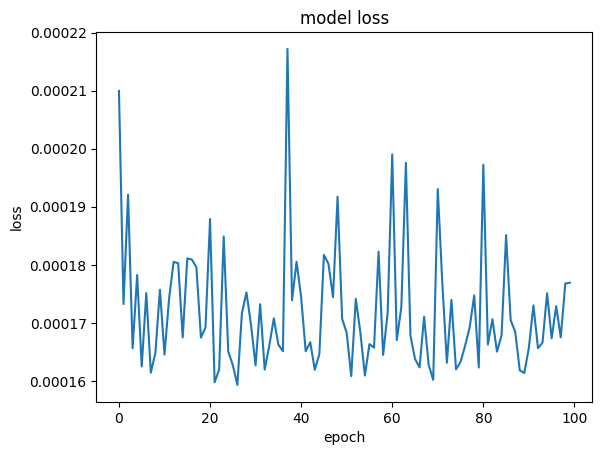

In [19]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [20]:
model.predict(X_test)

4/4 [==============================] - 0s 904us/step


array([[-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0.00119704],
       [-0

In [21]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 1ms/step - loss: 1.4004e-04 - accuracy: 0.2661


[0.00014003663090988994, 0.2661290466785431]